In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder

In [58]:
data=pd.read_csv(r"C:\Users\ytaj3\OneDrive\Desktop\housing.csv")

In [59]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [60]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [62]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [63]:
data["total_bedrooms"].fillna(data["total_bedrooms"].mean(),inplace=True)

In [64]:
data["total_bedrooms"].isnull().sum()

0

In [65]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [66]:
data.drop_duplicates("total_bedrooms",inplace=True)

In [67]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [68]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [69]:
data=data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

In [70]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

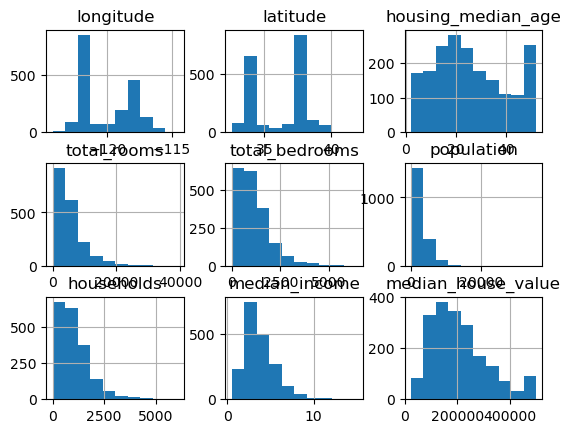

In [71]:
data.hist()

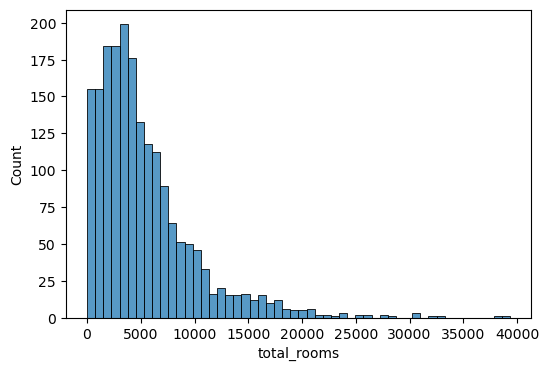

In [72]:
plt.figure(figsize=(6,4))
sns.histplot(data.total_rooms)
plt.show()


In [73]:
data.total_rooms.skew()

2.0949674786737584

C:\Users\ytaj3\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


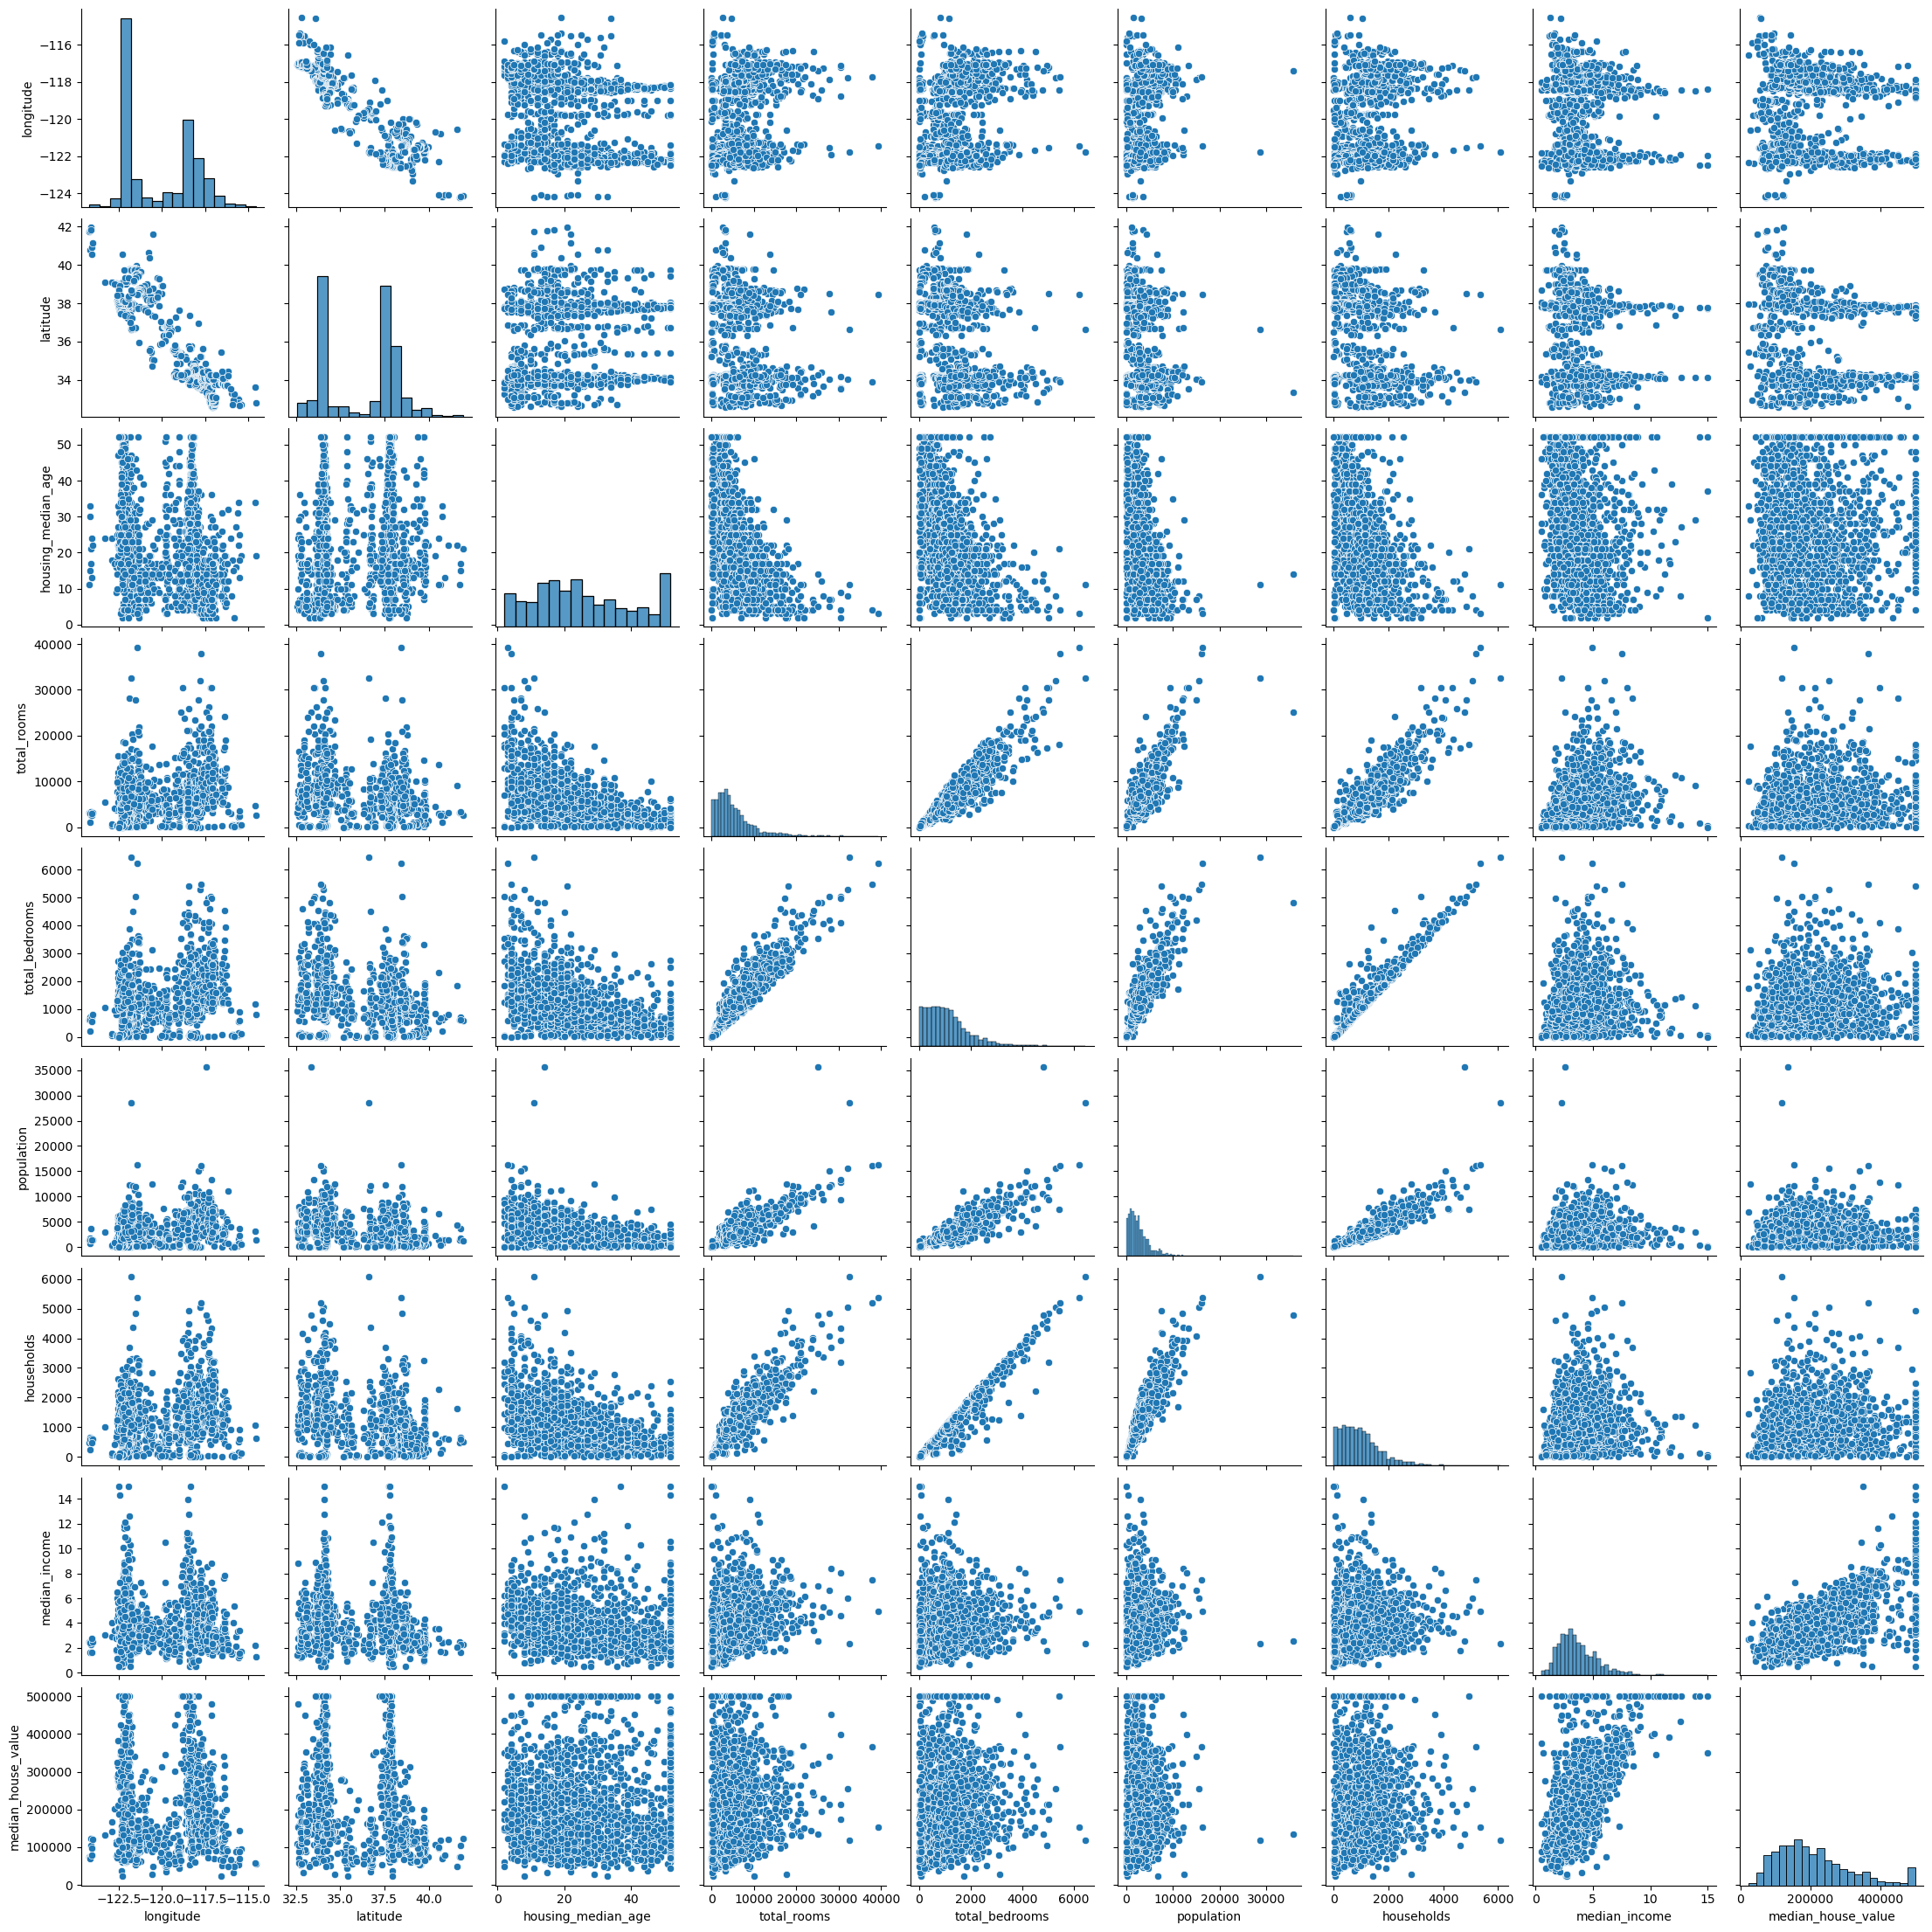

In [74]:
sns.pairplot(data)

In [75]:
data["updated_total_rooms"],lambda_val=boxcox(data.total_rooms)

In [76]:
lambda_val

0.3146299072533911

In [77]:
data.updated_total_rooms.skew()

0.014503345362171082

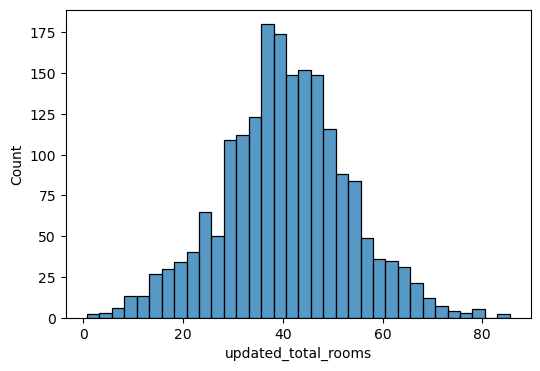

In [78]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_total_rooms)
plt.show()

In [79]:
data.population.skew()

3.256954043597479

In [80]:
data["updated_population"],lambda_val=boxcox(data.population)

In [81]:
lambda_val

0.3139514970071024

In [82]:
data.updated_population.skew()

0.01993235961007402

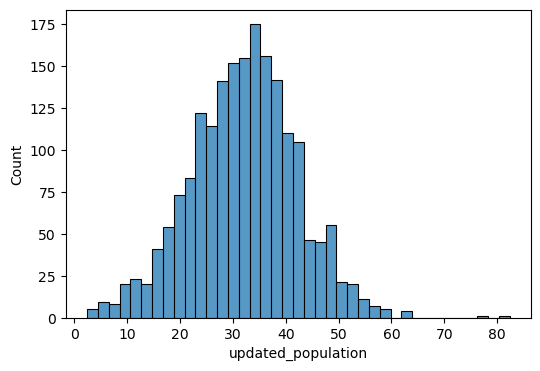

In [83]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_population)
plt.show()

In [84]:
data.households.skew()

1.5879983630531767

In [85]:
data["updated_households"],lambda_val=boxcox(data.households)

In [86]:
lambda_val

0.3929224644588964

In [87]:
data.updated_households.skew()

-0.0296493984889528

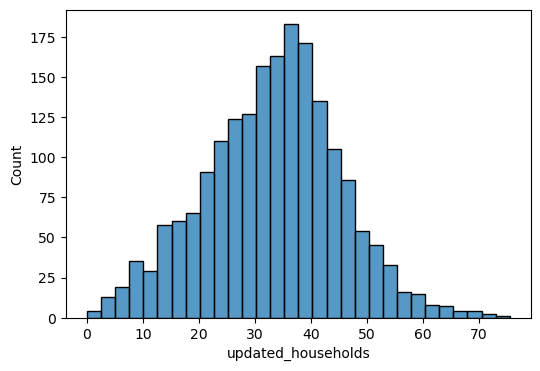

In [88]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_households)
plt.show()

In [89]:
data.median_income.skew()

1.5579527497575356

In [90]:
data["updated_median_income"],lambda_val=boxcox(data.median_income)

In [91]:
lambda_val

0.15013475461173603

In [92]:
data.updated_median_income.skew()

0.011689914525491497

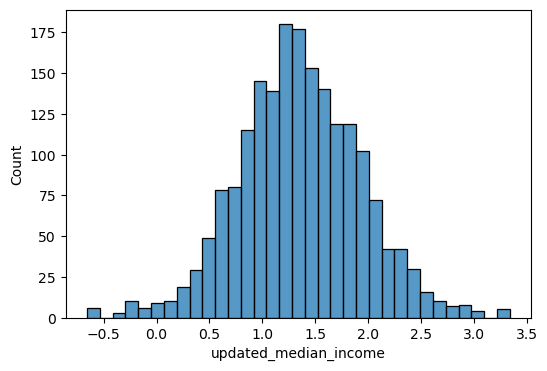

In [93]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_median_income)
plt.show()

In [94]:
data.median_house_value.skew()

0.9561336509326439

In [95]:
data["updated_median_house_value"],lambda_val=boxcox(data.median_house_value)

In [96]:
lambda_val

0.18307856812231157

In [97]:
data.updated_median_house_value.skew()

-0.011114059536641928

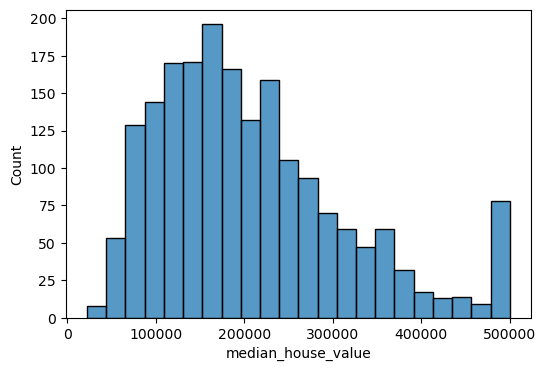

In [98]:
plt.figure(figsize=(6,4))
sns.histplot(data.median_house_value)
plt.show()

In [99]:
data.housing_median_age.skew()

0.3936545718992803

In [100]:
data["updated_housing_median_age"],lambda_val=boxcox(data.housing_median_age)

In [101]:
lambda_val

0.5137480385400681

In [102]:
data.updated_housing_median_age.skew()

-0.10702279353448402

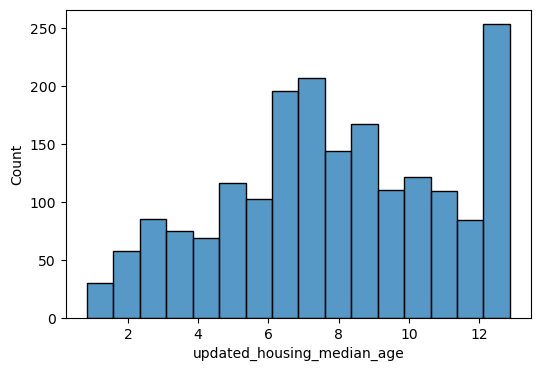

In [103]:
plt.figure(figsize=(6,4))
sns.histplot(data.updated_housing_median_age)
plt.show()

In [105]:
scaler = StandardScaler()
data["housing_median_age"]=scaler.fit_transform(data[["housing_median_age"]])
data["total_rooms"]=scaler.fit_transform(data[["total_rooms"]])
data["total_bedrooms"]=scaler.fit_transform(data[["total_bedrooms"]])
data["population"]=scaler.fit_transform(data[["population"]])
data["households"]=scaler.fit_transform(data[["households"]])
data["median_income"]=scaler.fit_transform(data[["median_income"]])
data["median_house_value"]=scaler.fit_transform(data[["median_house_value"]])

In [106]:
x=data[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y=data["median_house_value"]

In [107]:
x.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.057524,-0.952079,-1.136626,-0.995557,-1.124571,2.404276
1,-0.314939,0.366735,-0.014630,-0.133802,0.158423,2.391687
2,1.812378,-0.827599,-1.066573,-0.923433,-1.059914,1.839463
3,1.812378,-0.868527,-1.014894,-0.897734,-1.006667,0.985581
4,1.812378,-0.793669,-0.963216,-0.894833,-0.955956,0.035111


In [108]:
x.shape,y.shape

((1924, 6), (1924,))

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [111]:
y_train.shape,y_test.shape

((1539,), (385,))

In [113]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [115]:
model.intercept_, model.coef_

(-0.006156969160903213,
 array([ 0.21048353, -0.52641159,  0.40508185, -0.32231175,  0.51951635,
         0.81012192]))

In [116]:
predited_val = model.predict(x_test)

In [117]:
predited_val

array([ 7.67397176e-01, -2.22061447e-01, -3.56176332e-01, -2.88911971e-01,
        6.85642873e-01, -2.80268816e-02,  1.23397147e-01, -3.56114547e-02,
        5.39365180e-01, -5.43842297e-01, -2.99594636e-01, -2.70196032e-02,
        1.79532191e+00,  2.17293108e-01,  2.14067994e-01,  6.80510563e-01,
        4.70941895e-01,  4.43234680e-01,  2.98541405e+00,  5.88397399e-01,
        1.03758807e+00,  9.75328490e-01,  1.68195673e+00,  4.21494687e-01,
       -1.41853253e-01,  9.43205541e-01, -5.11156542e-02,  6.89451436e-01,
       -6.66437408e-01, -2.23509684e-01,  1.10206641e-01,  1.18643741e+00,
       -2.95808076e-01,  6.36768522e-01, -5.45250154e-01,  9.05973232e-01,
       -3.07075675e-01, -9.72584631e-01, -6.12160100e-01,  3.86349710e-01,
        1.34136340e-01,  4.58239742e-01,  6.53903491e-01, -4.68615218e-01,
       -3.51222221e-01,  8.56296833e-01,  2.38710792e-01, -3.92433553e-01,
        6.23343375e-01, -9.58097642e-02, -5.70526047e-01, -5.11015111e-01,
       -6.40045257e-01, -

In [118]:
mean_squared_error(y_test,predited_val)*100

49.918207386971424

In [119]:
r2_score(y_test,predited_val)

0.5875243910122898